### Noter til mig selv
- Filen 'mix_it_up.ipynb' i final_another_dataset virker til ug og er lavet om til script ('yoga_CNN.py') som også virker! 
    - Scriptet er dog lavet i én funktion...
    - og clear_session virker ikke i script
- Næste step er at lave denne notebook om til script.
    - Evt forsøg at lave mere end én funktion... 
    - Ryd op i importerede pakker 
    - Lav gode kommentarer 

In [25]:
# operating system
import os

# for plotting
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Python Imaging Library
from PIL import Image

# tensorflow tools
import tensorflow as tf
import keras
#from keras import regularizers
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import (Conv2D,
                                     MaxPooling2D, 
                                     Activation, 
                                     Flatten, 
                                     Dense,
                                     Input)

In [4]:
# filepath to directory
file_path = 'input' #directory with  images

In [5]:
# folder for displaying images
folder = tf.keras.utils.image_dataset_from_directory(file_path)

# get class names
class_names = folder.class_names

Found 6023 files belonging to 107 classes.


2022-05-16 10:24:39.525864: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-16 10:24:39.525927: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (j-71137-job-0): /proc/driver/nvidia/version does not exist
2022-05-16 10:24:39.526301: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2022-05-16 10:35:01.399587: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


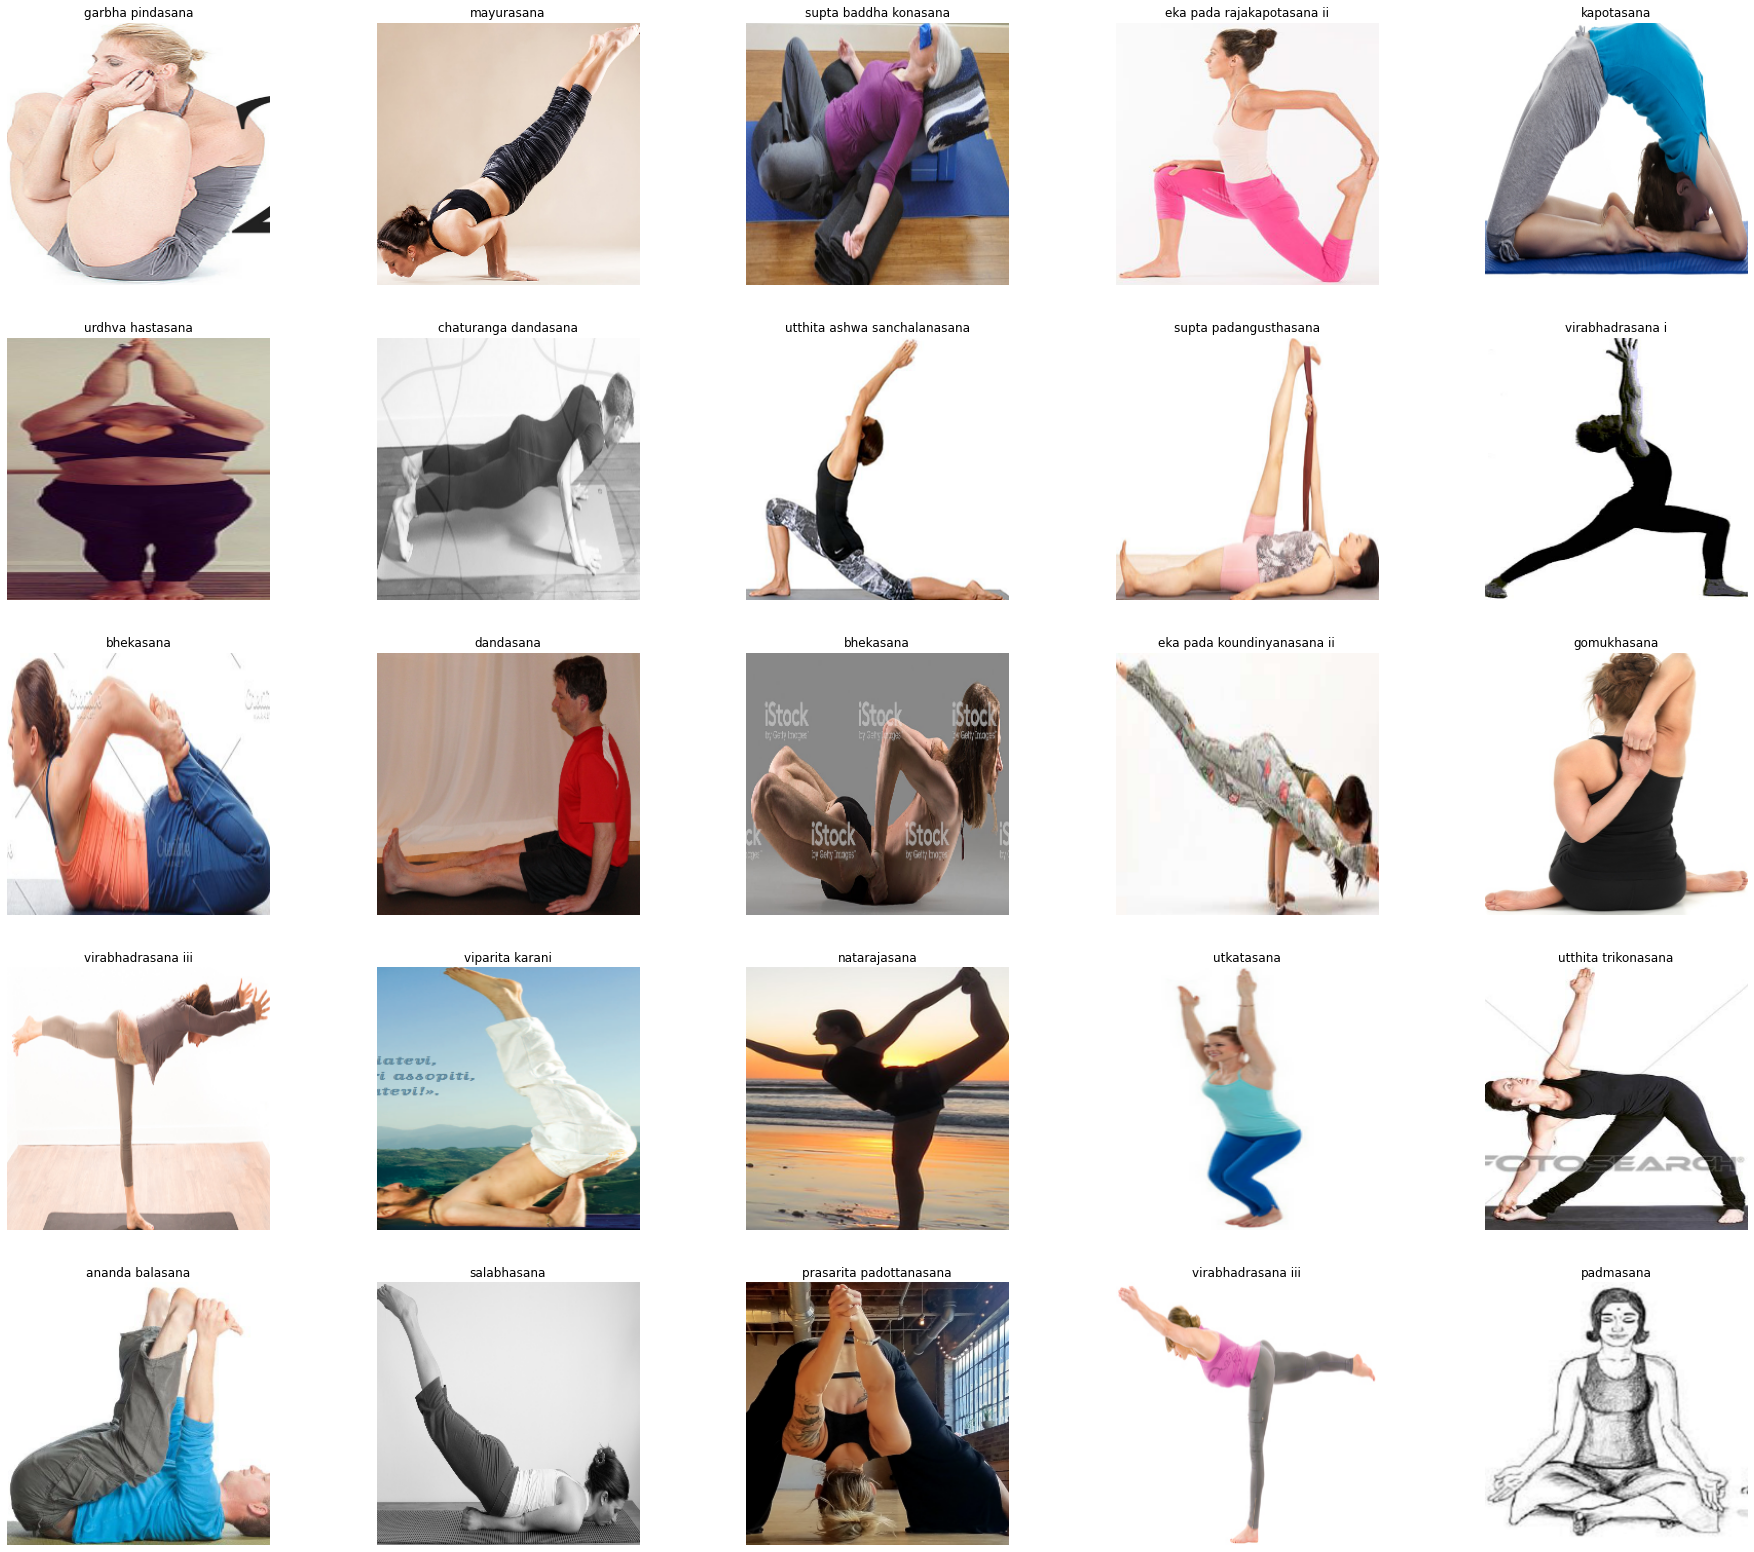

In [20]:
# display 25 images from the dataset.
plt.figure(figsize=(32,28))
# for every image + label in the folder 
for images, labels in folder.take(1):
    for i in range(25):
        # plot 5x5
        ax = plt.subplot(5,5, i + 1)
        # plot images
        plt.imshow(images[i].numpy().astype("uint8"))
        # set title to class names
        plt.title(class_names[labels[i]])
        # remove axis of images
        plt.axis("off")
        # save the 25 images 
        plt.savefig(os.path.join("output/different_yoga_poses.png"))

In [27]:
# Generate batches of tensor image data 
generator = ImageDataGenerator(width_shift_range= 0.1,         # set range
                               horizontal_flip = True,         # flip horizontal
                               rescale = 1./255,               # normalize
                               validation_split = 0.2)         # split dataset

In [29]:
# create train dataset
train_generator =  generator.flow_from_directory(directory = file_path,
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')

# create validation dataset
validation_generator  = generator.flow_from_directory(directory = file_path,
                                                           target_size = (224,224),
                                                           color_mode = 'rgb',
                                                           class_mode = 'categorical',
                                                           subset = 'validation')

Found 4858 images belonging to 107 classes.
Found 1163 images belonging to 107 classes.


In [ ]:
# clear models and parameters stored in memory
tf.keras.backend.clear_session()

In [9]:
# Define model
model = Sequential()
# add first set of layers 
model.add(Conv2D(64, (3,3),                          
                 padding = "same",
                 input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2),             
                       strides = (2,2,)))

# add second set of layers 
model.add(Conv2D(128, (5,5),
                 padding = "same")) 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2),
                       strides = (2,2)))

# add third set of layers
model.add(Conv2D(128, (5,5),
                 padding = "same")) 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2),
                       strides = (2,2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))

model.add(Dense(107))
model.add(Activation("softmax"))

In [10]:
# show model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     204928    
                                                                 
 activation_1 (Activation)   (None, 112, 112, 128)     0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

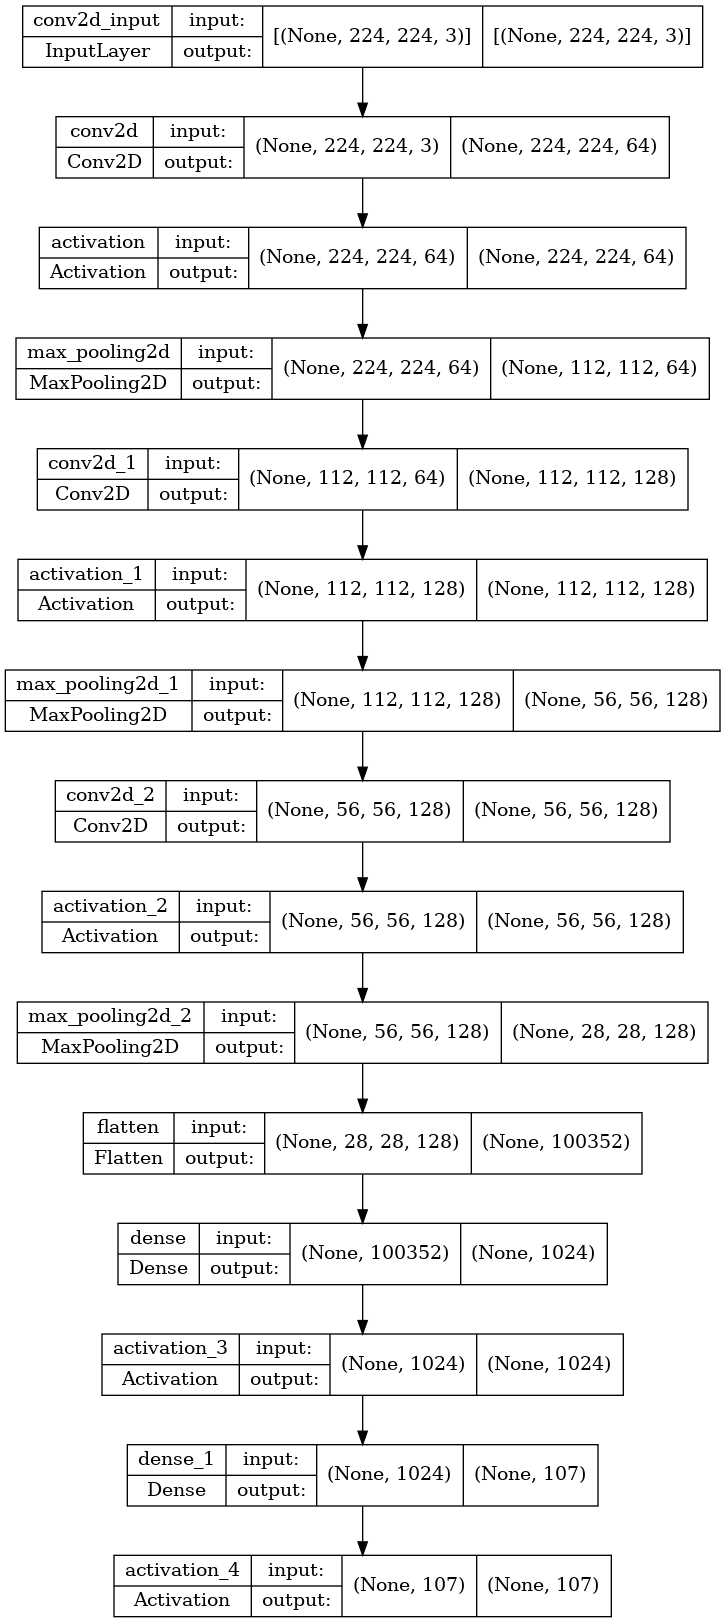

In [13]:
# plot sequential model and save to output
plot_model(model, to_file="output/sequential_model.png", show_shapes = True, show_layer_names = True)

In [14]:
# Define the gradient descent
#sgd = SGD(0.01)
optimizer = Adam(learning_rate=0.001)

# compile model
model.compile(loss = "categorical_crossentropy",
             optimizer = optimizer,
             metrics = ["accuracy"])

In [15]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=10)

In [17]:
def plot_history(H, epochs):
    plt.style.use("seaborn-colorblind")

    # create canvas
    plt.figure(figsize=(12,6))
    # create subplot, 1 row, 2 colomns and use the first image
    plt.subplot(1,2,1)
    # take training loss from history and plot with each depth from 0 to 10
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    # and take validation loss, validation plot is going to be visualised as pots (linestyle)
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss", linestyle=":")
    plt.title("Loss curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    # tight layout
    plt.tight_layout()
    # adding legend
    plt.legend()

    # 1 row, 2 columns, use the second image 
    plt.subplot(1,2,2)
    # accuracy instead of loss
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc", linestyle=":")
    plt.title("Accuracy curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend()
    
    # save model
    plt.savefig(os.path.join("output", "trained_model.png"))

In [18]:
plot_history(history, 10)

NameError: name 'history' is not defined

In [ ]:
# Final evaluation of the model
val_scores = model.evaluate(validation_generator, verbose=1)

print(("The loss score of the validation dataset {val_scores[0]}") \
      .format(val_scores = val_scores))

print(("The accuracy score of the validation dataset {val_scores[1]}") \
      .format(val_scores = val_scores))

In [26]:
# Final evaluation of the model
train_scores = model.evaluate(train_generator, verbose=1)

print(("The loss score of the train dataset {train_scores[0]}") \
      .format(train_scores = train_scores))

print(("The accuracy score of the train dataset {train_scores[1]}") \
      .format(train_scores = train_scores))

 26/304 [=>............................] - ETA: 1:02 - loss: 0.5759 - accuracy: 0.8630

/opt/conda/lib/python3.9/site-packages/PIL/Image.py:973: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


304/304 [==============================] - 70s 229ms/step - loss: 0.6267 - accuracy: 0.8483
The loss score of the train dataset 0.6266724467277527
The accuracy score of the train dataset 0.8482914566993713


In [36]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)

print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

 39/304 [==>...........................] - ETA: 1:07 - loss: 0.6958 - accuracy: 0.8141

/opt/conda/lib/python3.9/site-packages/PIL/Image.py:973: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


37/37 [==============================] - 17s 452ms/step - loss: 3.1097 - accuracy: 0.3947
final train accuracy = 84.01 , validation accuracy = 39.47
